# Masterthesis - Plots

### Imports

In [2]:
library(ggplot2)
library(dplyr)
library(tikzDevice)
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [3]:
#detach("package:elasdics2d", unload=TRUE)
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)

### Define theme

In [4]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

### Prepare Digits3 Data

In [5]:
library(elasticproc2d)
source("../scripts/load_datasets.R")

set.seed(18)
data_curves <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE)

knots <- seq(0, 1, length = 13)

In [6]:
mean1 <- compute_elastic_proc2d_mean(data_curves, knots = knots, type = "smooth", penalty = 2, pfit_method = "linear")
mean2 <- compute_elastic_proc2d_mean(data_curves, knots = knots, type = "smooth", penalty = 2, pfit_method = "smooth")

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

#### Smooth observed curves

In [7]:
pfits.smooth <- lapply(seq_along(mean2$data_curves), function(j){
  knots <- mean2$knots
  type <- mean2$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean2$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits <- lapply(seq_along(mean2$data_curves), function(j){
    center_curve(mean2$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves[[j]])
})[seq(1,10)]

# Figures

#### Fig. 1.1: Same shape, different transformation.

png 
  2

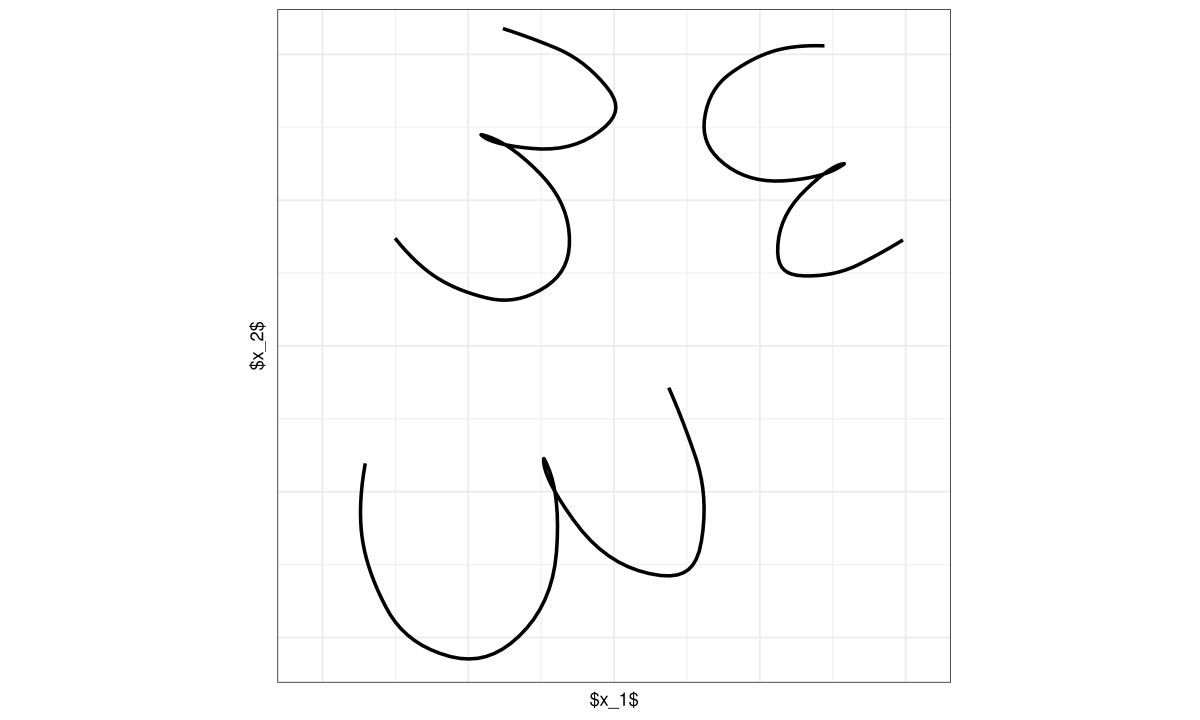

In [7]:
set.seed(4)

pfits.example <- lapply(seq_along(seq(3)), function(j){
    pfit <- pfits.smooth[[3]]
    pfit <- rand_rotate_curve2d(pfit)
    pfit <- rand_scale_curve2d(pfit)
    pfit$X1 <- pfit$X1 - 0.4*(runif(1) - 0.60)
    pfit$X2 <- pfit$X2 - 0.4*(runif(1) - 0.58)
    pfit
})

p.shape <- ggplot(bind_rows(pfits.example, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 1, color="black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21))

tikzDevice::tikz(file = "../tex/graphics/1-eucl.tex", width = 3, height = 3)
print(p.shape)
dev.off()
p.shape

png 
  2

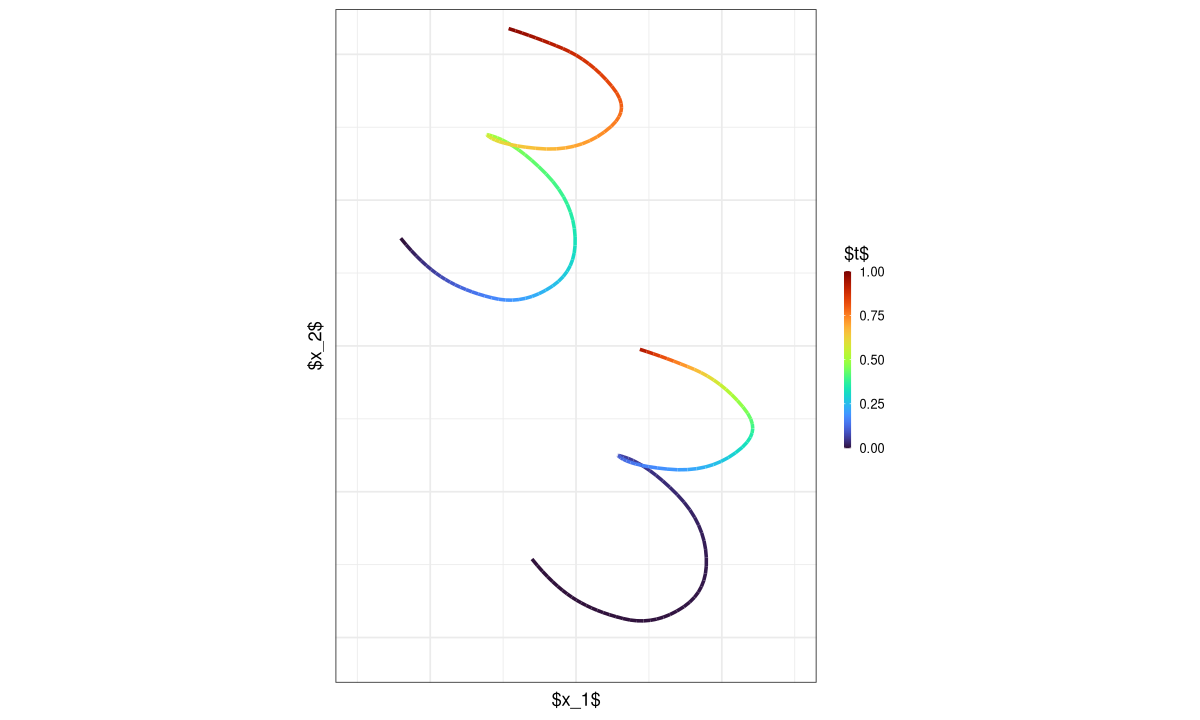

In [8]:
pfits.warp <- lapply(seq(2), function(j){
    pfit <- pfits.example[[3]]
    pfit$t <- seq(0, 1, length.out=length(pfit$X1))
    if(j == 1){pfit$X1 <- pfit$X1 + 0.03}
    if(j == 2){
        pfit$t <- pfit$t^4
        pfit$X1 <- pfit$X1 + 0.12
        pfit$X2 <- pfit$X2 - 0.22
    }
    pfit
})

p.warp <- ggplot(bind_rows(pfits.warp, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id, col=t), size = 1) +
    scale_color_viridis(option = "H") +
    labs(x = "$x_1$", y = "$x_2$", color="$t$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank(),
        legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.15, 'cm'),
        legend.text = element_text(size=rel(0.7))) +
    coord_fixed(xlim = c(-0.15,0.15), ylim = c(-0.21, 0.21))

tikzDevice::tikz(file = "../tex/graphics/1-warp.tex", width = 3, height = 3)
print(p.warp)
dev.off()
p.warp

#### Fig 1.2: Sparse and Dense Observations

png 
  2

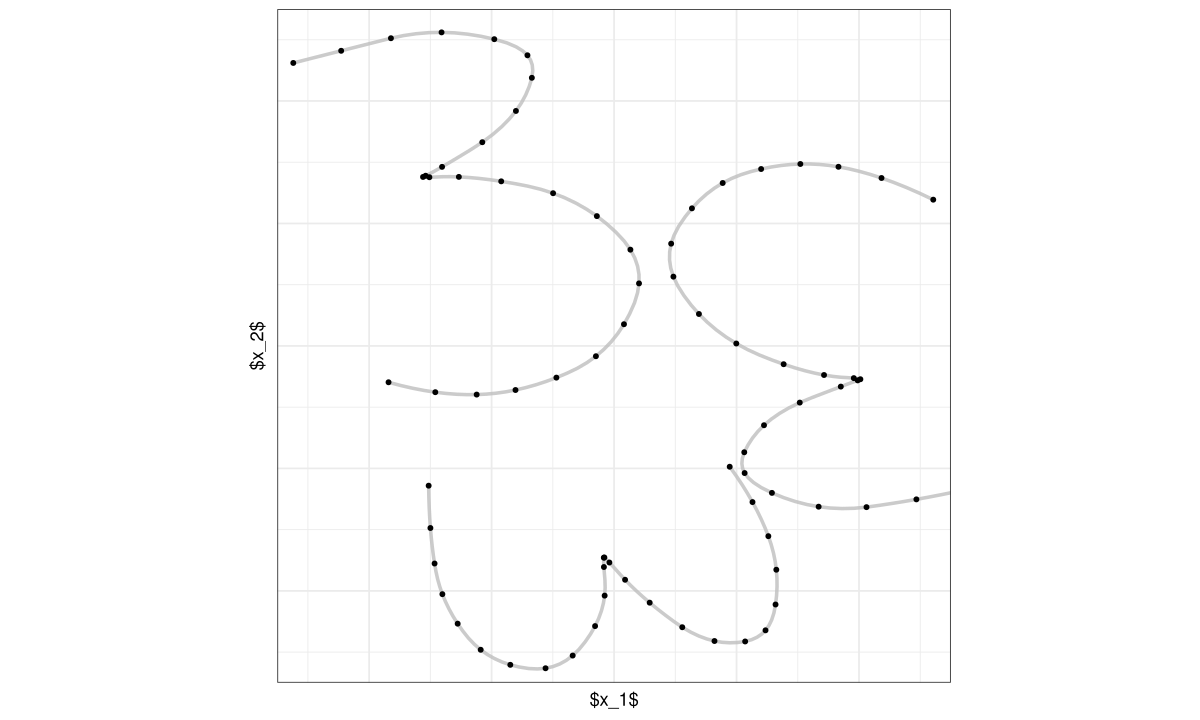

In [9]:
pfits.dense <- lapply(seq(3), function(j){
    pfit <- pfits.smooth[[j+1]]
    if(j == 1){
        pfit$X1 <- pfit$X1
        pfit$X2 <- pfit$X2 - 0.2
    }
    if(j == 2){
        pfit <- pfits.smooth[[8]]
        pfit$X1 <- pfit$X1 + 0.15
        pfit$X2 <- pfit$X2 + 0.00
    }
    if(j == 3){
        pfit$X1 <- pfit$X1 - 0.10
        pfit$X2 <- pfit$X2 + 0.12
    }
    pfit$t <- seq(0, 1, length.out=length(pfit$X1))
    pfit
})
pfits.dense4 <- lapply(seq(3), function(j){
    pfit <- pfits.dense[[j]]
    pfit %>% slice(which(row_number() %% 4 == 1))
})

p.dense <- ggplot(bind_rows(pfits.dense4, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data = bind_rows(pfits.dense, .id="id"), aes(group=id), size = 1, color="grey", alpha=0.8) +
    geom_point(size = 1, color = "black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.25,0.25), ylim = c(-0.25, 0.25))

tikzDevice::tikz(file = "../tex/graphics/1-dense.tex", width = 3, height = 3)
print(p.dense)
dev.off()
p.dense

png 
  2

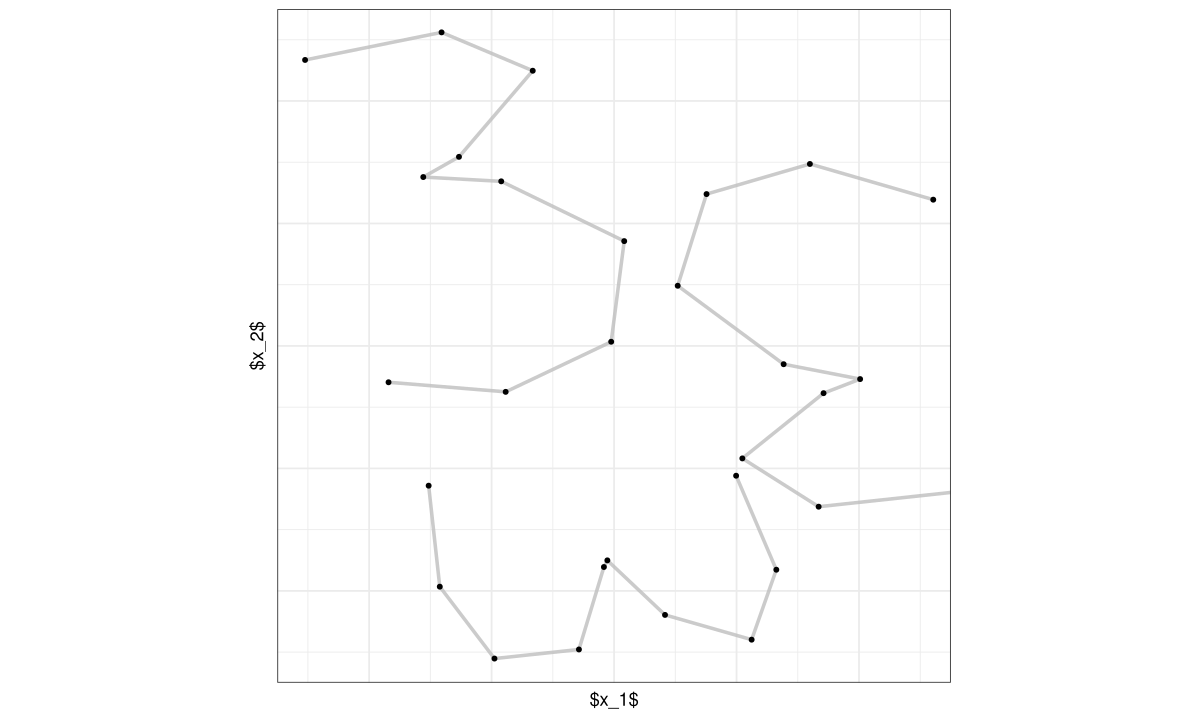

In [10]:
pfits.sparse <- lapply(seq(3), function(j){
    pfit <- pfits.dense[[j]]
    pfit %>% slice(which(row_number() %% 11 == 1))
})

p.sparse <- ggplot(bind_rows(pfits.sparse, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 1, color="grey", alpha=0.8) +
    geom_point(size = 1, color = "black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.25,0.25), ylim = c(-0.25, 0.25))

tikzDevice::tikz(file = "../tex/graphics/1-sparse.tex", width = 3, height = 3)
print(p.sparse)
dev.off()
p.sparse

#### Fig. 1.3: Mean estimation from Sparse and Irregular Planar Curves.

Warning message:
“Removed 52 row(s) containing missing values (geom_path).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 52 row(s) containing missing values (geom_path).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


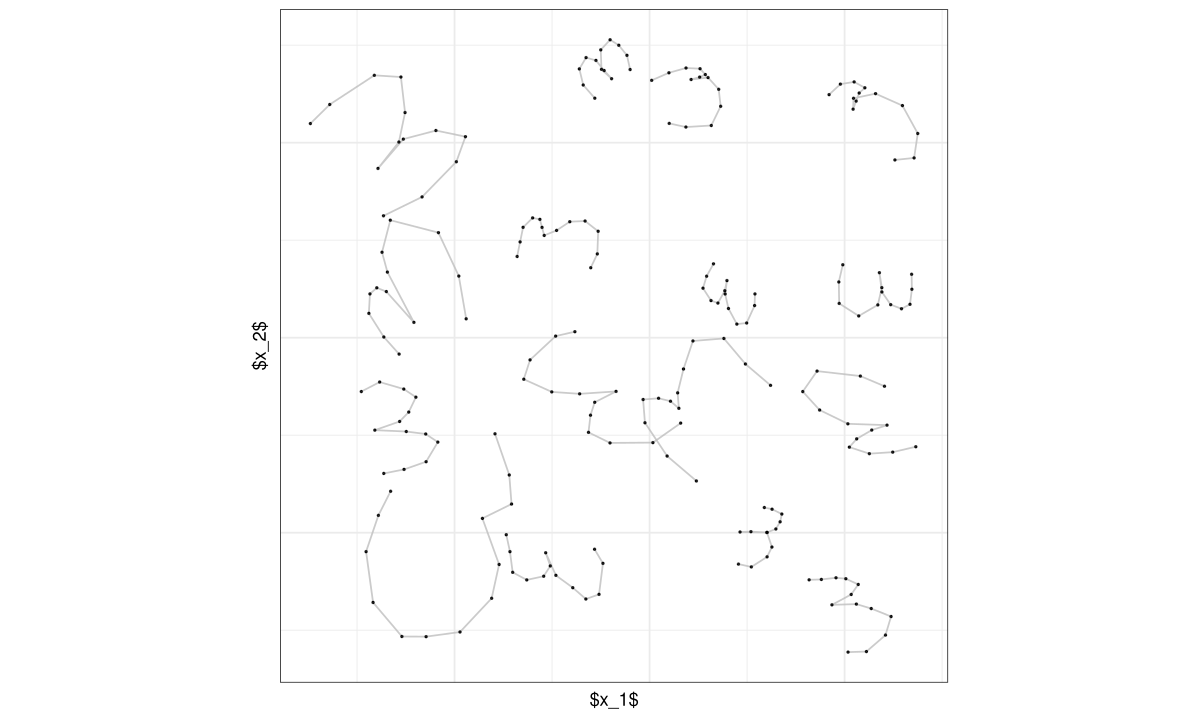

In [11]:
set.seed(20)
grid.x <- seq(-60,+60, length=4)
grid.y <- seq(-60,+60, length=4)
grid.xy <- expand.grid(grid.x,grid.y)
data.plot <- lapply(seq(20), function(j){
    curve <- data_curves[[j]]
    curve$X1 <- curve$X1 - mean(curve$X1)
    curve$X2 <- curve$X2 - mean(curve$X2)
    curve$X1 <- curve$X1 + grid.xy$Var1[j] +  20*(runif(1) - 0.5)
    curve$X2 <- curve$X2 + grid.xy$Var2[j] +  20*(runif(1) - 0.5)
    curve
})

p.obs <- ggplot(bind_rows(data.plot, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 0.5, color="grey", alpha=0.8) +
    geom_point(size = 0.3, color = "black", alpha=0.8) +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed()

tikzDevice::tikz(file = "../tex/graphics/1-obs.tex", width = 3, height = 3)
print(p.obs)
dev.off()
p.obs

png 
  2

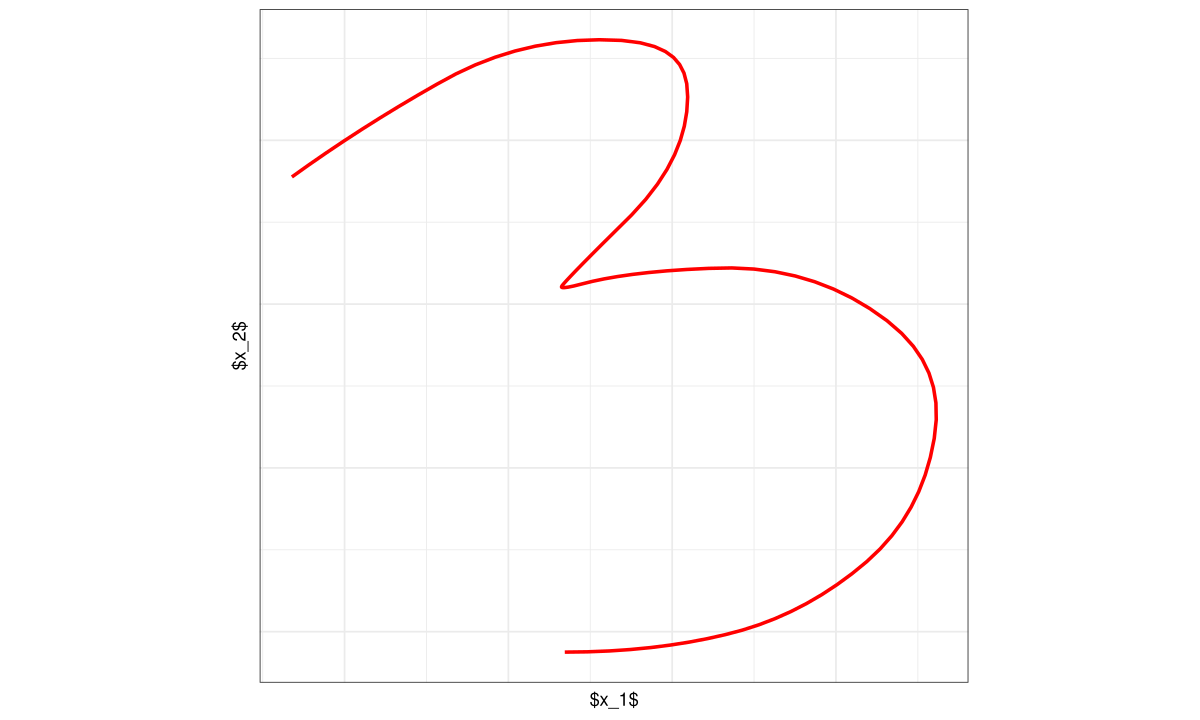

In [12]:
theta <- 0
mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
mean.rot <- as.matrix(get_evals(mean1)) %*% t(mat)
mean.rot <- as.data.frame(mean.rot)
colnames(mean.rot) <- c("X1", "X2")

p.mean <- ggplot(mean.rot, aes(x=X1, y=X2)) + 
    geom_path(size = 1, color="red") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed()

tikzDevice::tikz(file = "../tex/graphics/1-mean.tex", width = 3, height = 3)
print(p.mean)
dev.off()
p.mean

## 2. Elastic Full Procrustes Means for Planar Curves

#### Fig. 2.1: Curve Example

png 
  2

png 
  2

png 
  2

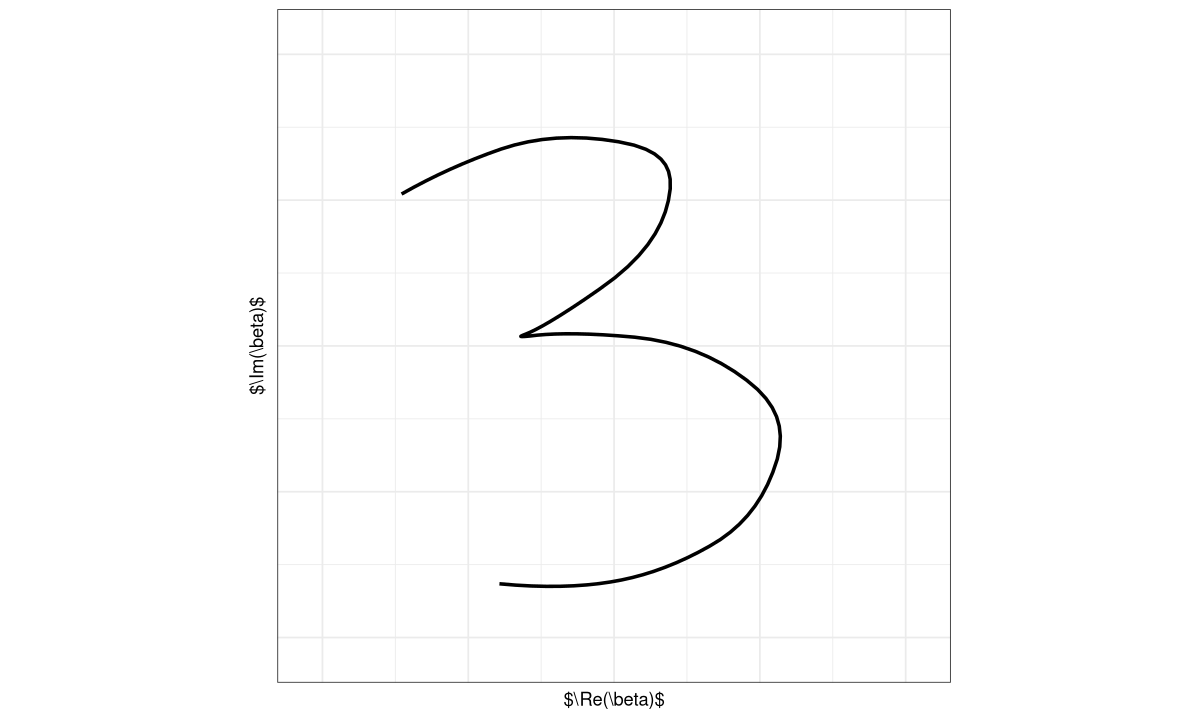

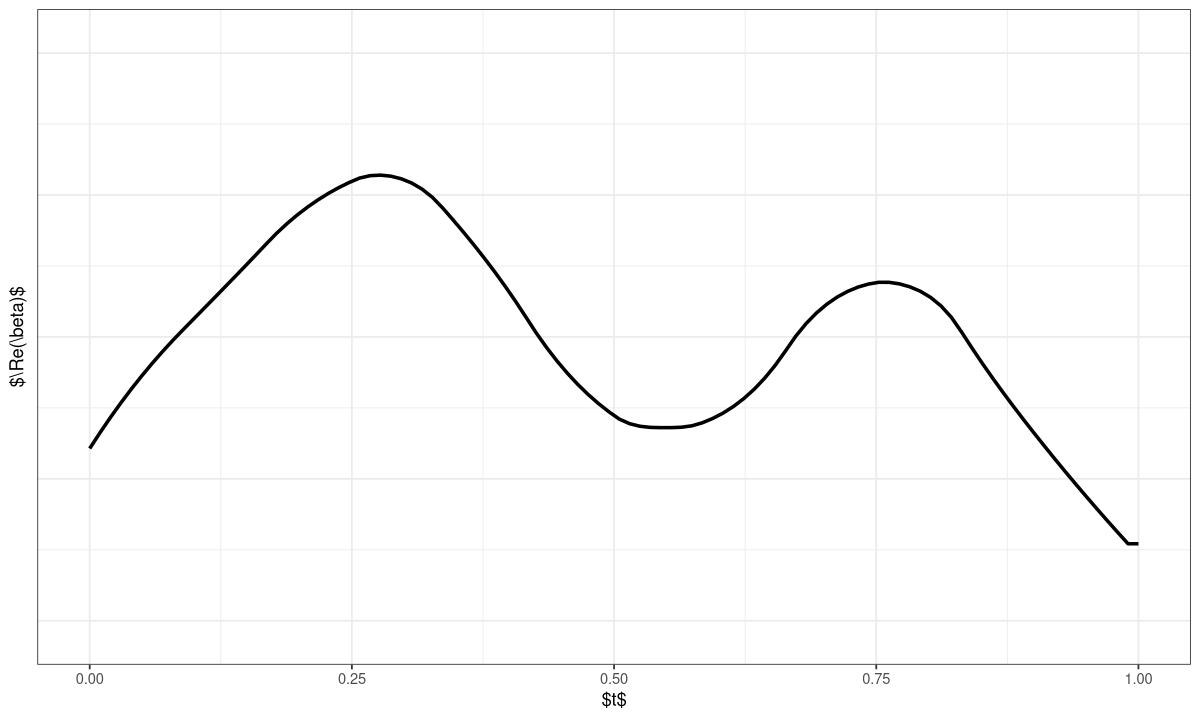

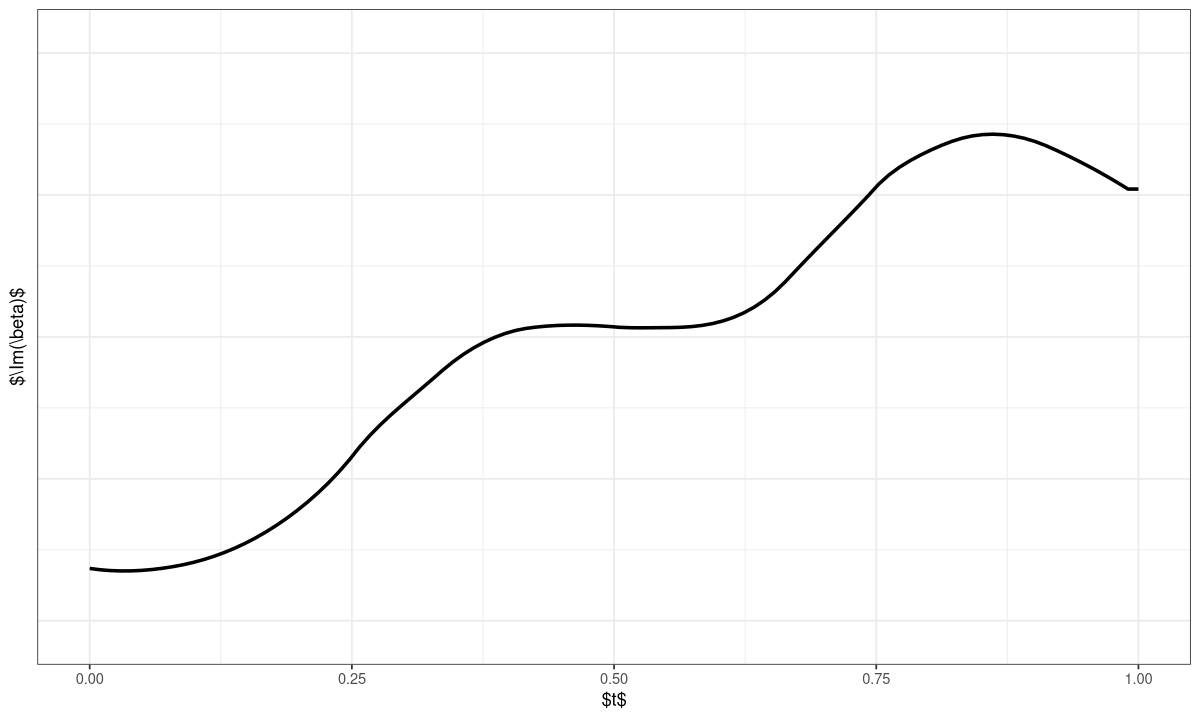

In [13]:
pfit <- pfits.smooth[[5]]
pfit$t <- seq(0, 1, length.out=length(pfit$X1))

p.curve <- ggplot(pfit, aes(x=X1, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank())

p.curveX <- ggplot(pfit, aes(x=t, y=X1)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Re(\\beta)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

p.curveY <- ggplot(pfit, aes(x=t, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

tikzDevice::tikz(file = "../tex/graphics/2-curve.tex", width = 3, height = 3)
print(p.curve)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-curveX.tex", width = 3, height = 1.4)
print(p.curveX)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-curveY.tex", width = 3, height = 1.4)
print(p.curveY)
dev.off()

plot(p.curve)
plot(p.curveX)
plot(p.curveY)

#### Fig. 2.2: SRV Example

png 
  2

png 
  2

png 
  2

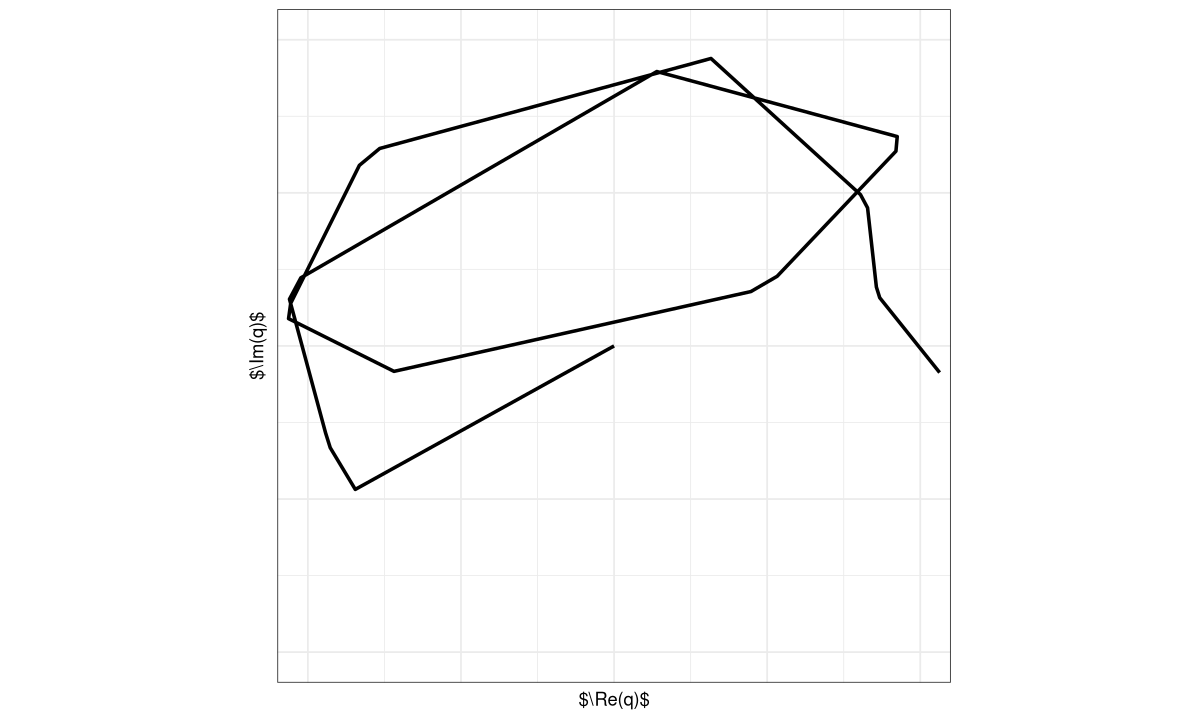

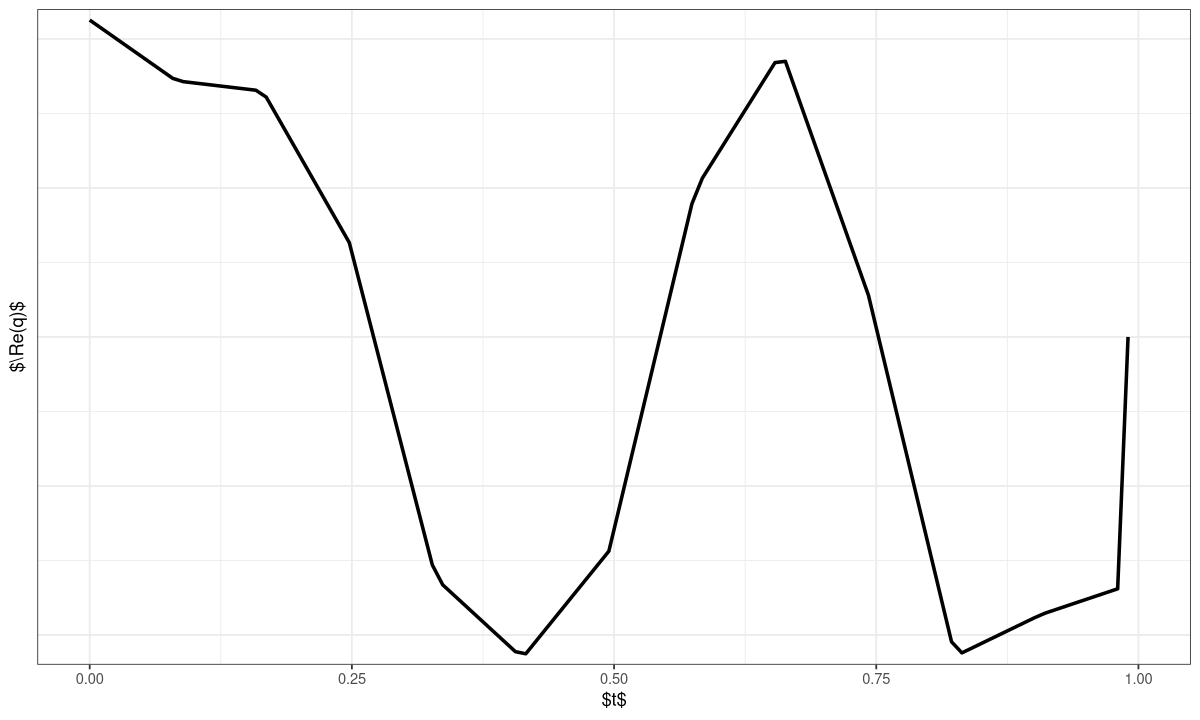

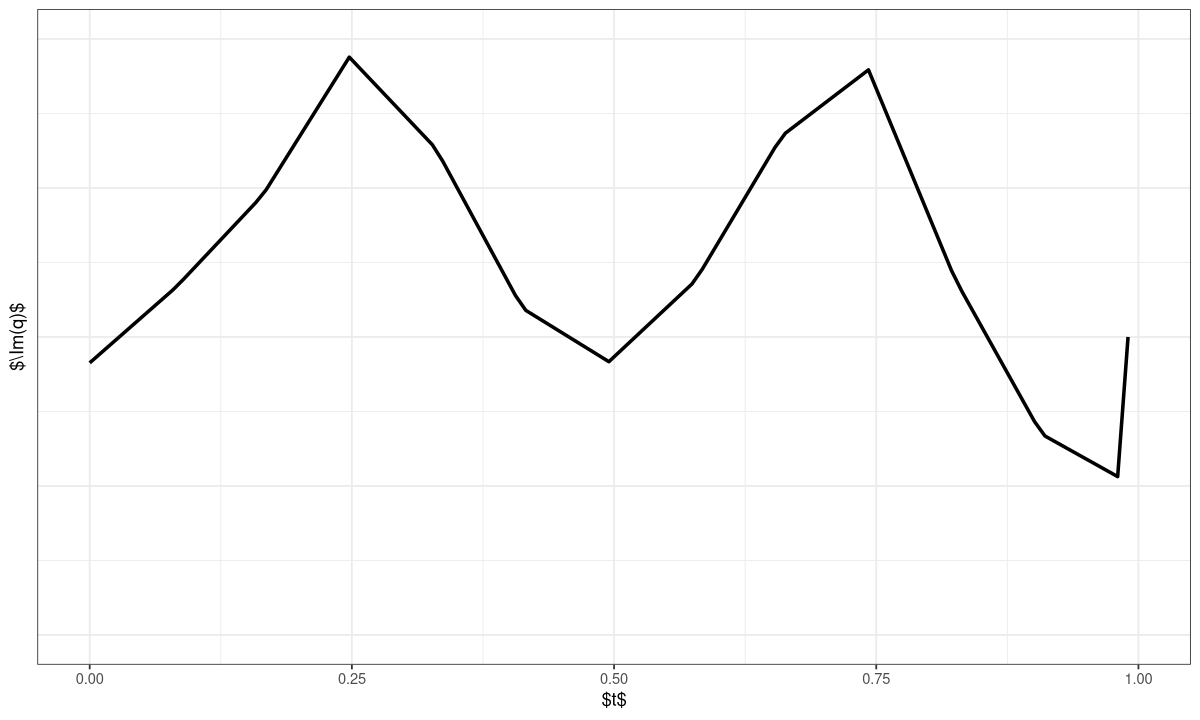

In [14]:
srvs.warp <- lapply(seq(2), function(j){
    pfit <- pfits.smooth[[5]]
    pfit$t <- seq(0, 1, length.out=length(pfit$X1))
    if(j == 1){pfit$X1 <- pfit$X1 + 0.03}
    if(j == 2){
        pfit$t <- pfit$t^4
        pfit$X1 <- pfit$X1 + 0.12
        pfit$X2 <- pfit$X2 - 0.22
    }
    srv <- elasdics::get_srv_from_points(pfit)
    srv
})

p.srv <- ggplot(srvs.warp[[1]], aes(x=X1, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$\\Re(q)$", y = "$\\Im(q)$") +
    theme_thesis() +
    coord_fixed(xlim = c(-1,1), ylim = c(-1, 1)) + 
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank())


p.srvX <- ggplot(srvs.warp[[1]], aes(x=t, y=X1)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Re(q)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-1,1)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

p.srvY <- ggplot(srvs.warp[[1]], aes(x=t, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Im(q)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-1, 1)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

tikzDevice::tikz(file = "../tex/graphics/2-srv.tex", width = 3, height = 3)
print(p.srv)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-srvX.tex", width = 3, height = 1.4)
print(p.srvX)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-srvY.tex", width = 3, height = 1.4)
print(p.srvY)
dev.off()

plot(p.srv)
plot(p.srvX)
plot(p.srvY)

#### Fig. 2.3: Procrustes Fit example

In [42]:
set.seed(18)
curves <- lapply(seq(2), function(j){
    pfit <- pfits.smooth[[2+j]]
    if(j == 2){
        pfit <- rand_rotate_curve2d(pfit)
        pfit$X1 <- pfit$X1 + 0.1
        pfit$X2 <- pfit$X2 - 0.05
    }
    pfit$t <- seq(0, 1, length=length(pfit$X1))
    pfit
})
srvs <- lapply(seq(2), function(j){
    pfit <- curves[[j]]
    elasdics::get_srv_from_points(pfit)
})

In [43]:
srv.pfit <- lapply(seq(2), function(j){
  knots <- mean2$knots
  type <- mean2$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean2$fit$pfit_coefs[[2+j]]
  if(j==2){
    w <- as.complex( t(Conj(mean2$fit$pfit_coefs[[2+j]])) %*% mean2$fit$gram %*% mean2$fit$pfit_coefs[[1+j]] )
    w <- w/sqrt(as.complex( t(Conj(mean2$fit$pfit_coefs[[2+j]])) %*% mean2$fit$gram %*% mean2$fit$pfit_coefs[[2+j]] ))
    w <- w/sqrt(as.complex( t(Conj(mean2$fit$pfit_coefs[[2+j]])) %*% mean2$fit$gram %*% mean2$fit$pfit_coefs[[2+j]] ))
    srv.compl <- w * elasticproc2d:::make_design(t, knots, type) %*%  mean2$fit$pfit_coefs[[2+j]]
  }
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
})
curves.pfit <- lapply(seq(2), function(j){
  curve <- elasdics::get_points_from_srv(srv.pfit[[j]])
  center_curve(curve)
})

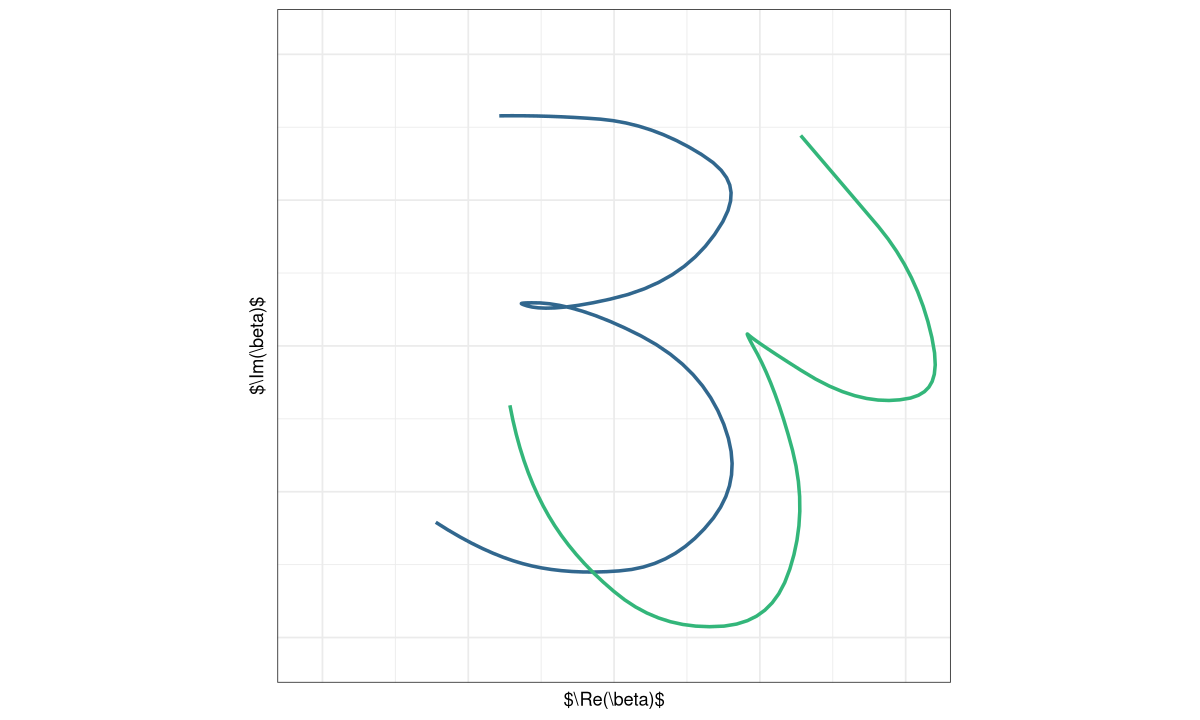

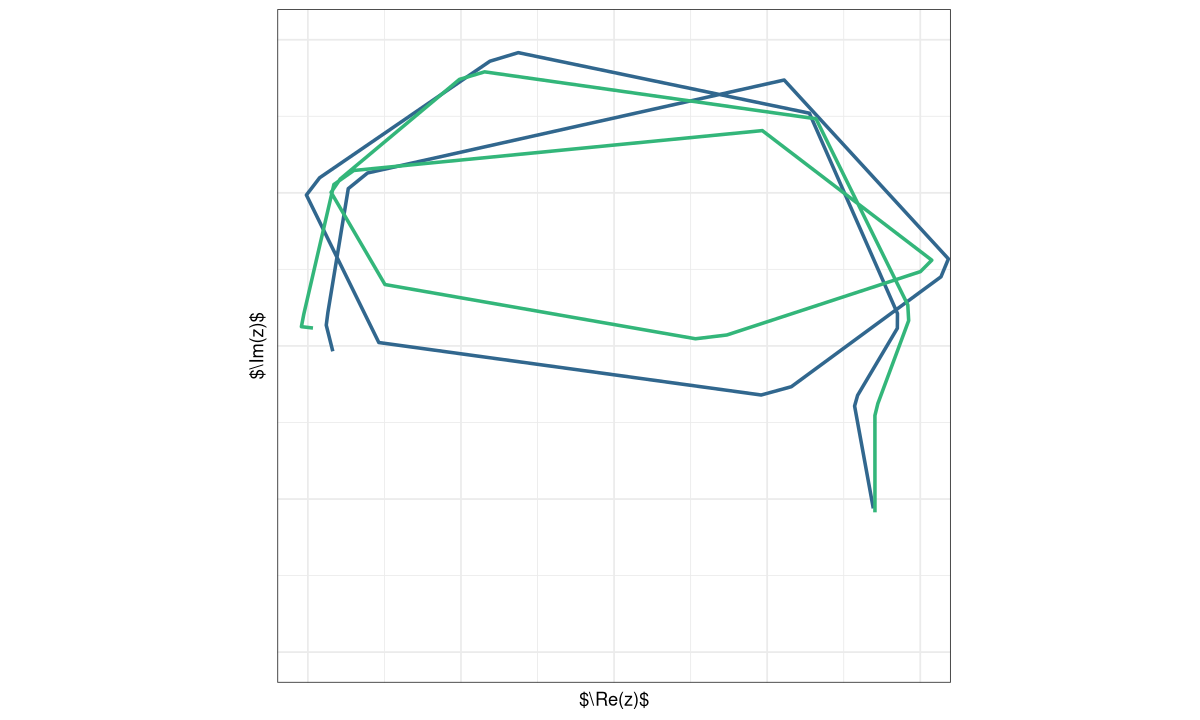

png 
  2

png 
  2

png 
  2

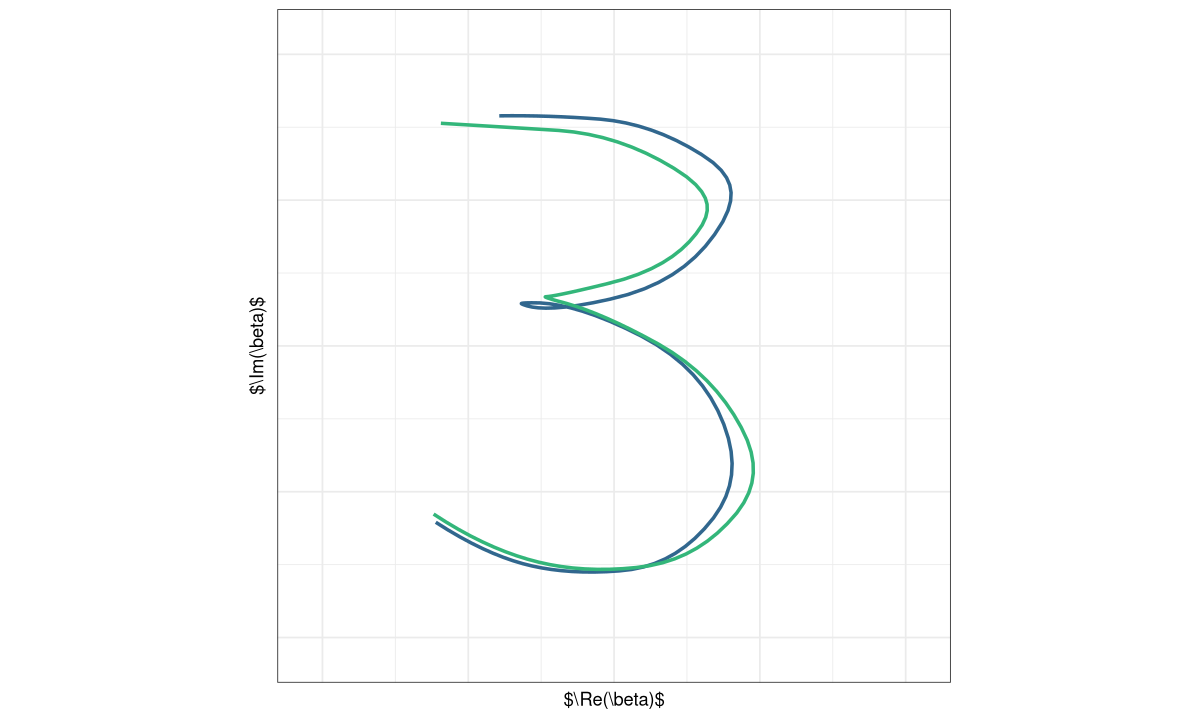

In [45]:
p.curves_match <- ggplot(bind_rows(curves, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id, color=id), size = 1) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    scale_colour_viridis_d(begin=0.33, end=0.66, guide="none") +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21))

plot(p.curves_match)

p.srv_pfit <- ggplot(bind_rows(srv.pfit, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id, color=id), size = 1) +
    labs(x = "$\\Re(z)$", y = "$\\Im(z)$") +
    theme_thesis() +
    scale_colour_viridis_d(begin=0.33, end=0.66, guide="none") +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-1,1), ylim = c(-1, 1))

plot(p.srv_pfit)

p.curves_pfit<- ggplot(bind_rows(curves.pfit, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id, color=id), size = 1) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    scale_colour_viridis_d(begin=0.33, end=0.66, guide="none") +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21))

plot(p.curves_pfit)

tikzDevice::tikz(file = "../tex/graphics/2-pfit.tex", width = 3, height = 3)
print(p.curves_match)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-pfit-srv-aligned.tex", width = 1.9, height = 1.9)
print(p.srv_pfit)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-pfit-aligned.tex", width = 3, height = 3)
print(p.curves_pfit)
dev.off()

#### Fig. 3.4: Elastic Procrustes Fit Example
TODO IMPLEMENT ALIGN CURVES FUNCTION!!!

In [8]:
# TODO

## Chapter 3 - Estimation Strategy

#### Fig. 3.1: Discrete Digit3

In [31]:
curve <- data_curves[[5]]
curve$t <- elasdics::get_arc_length_param(curve)

png 
  2

png 
  2

png 
  2

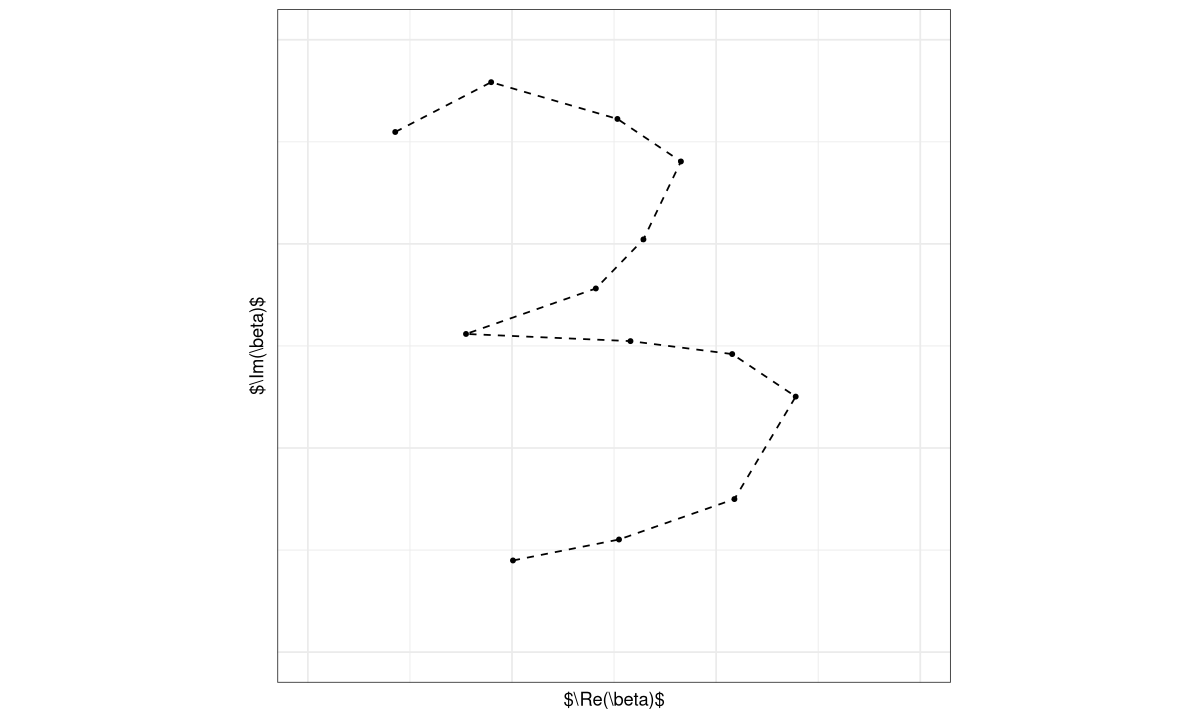

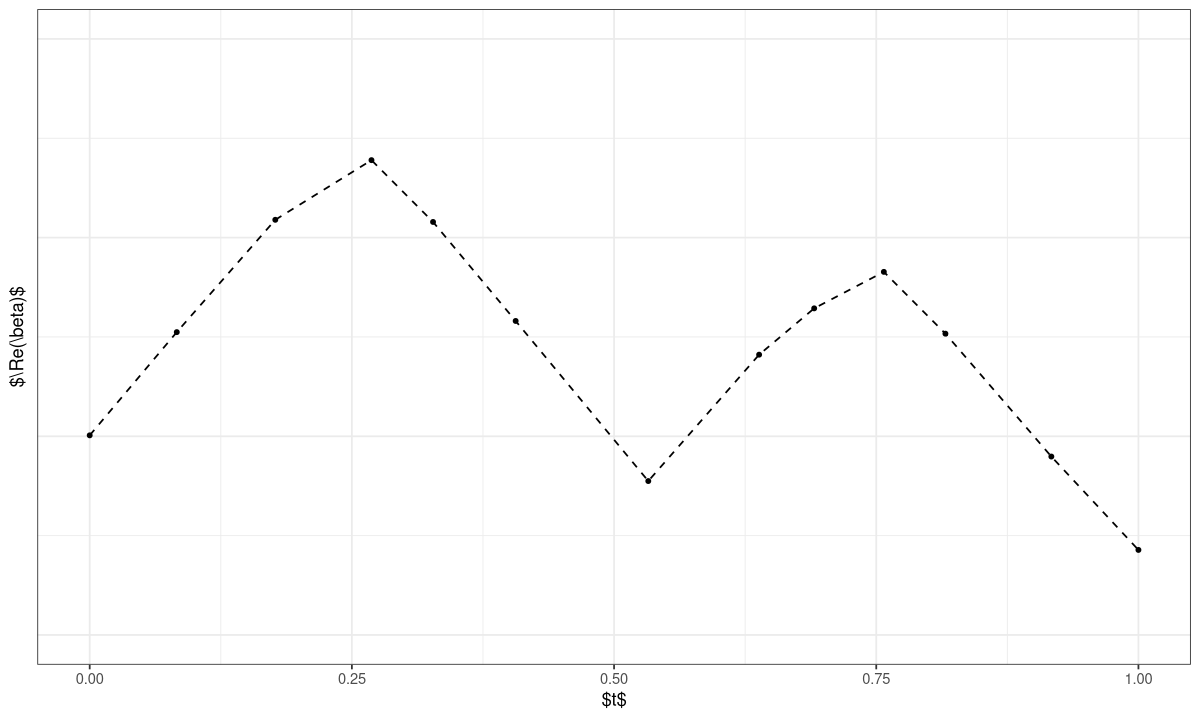

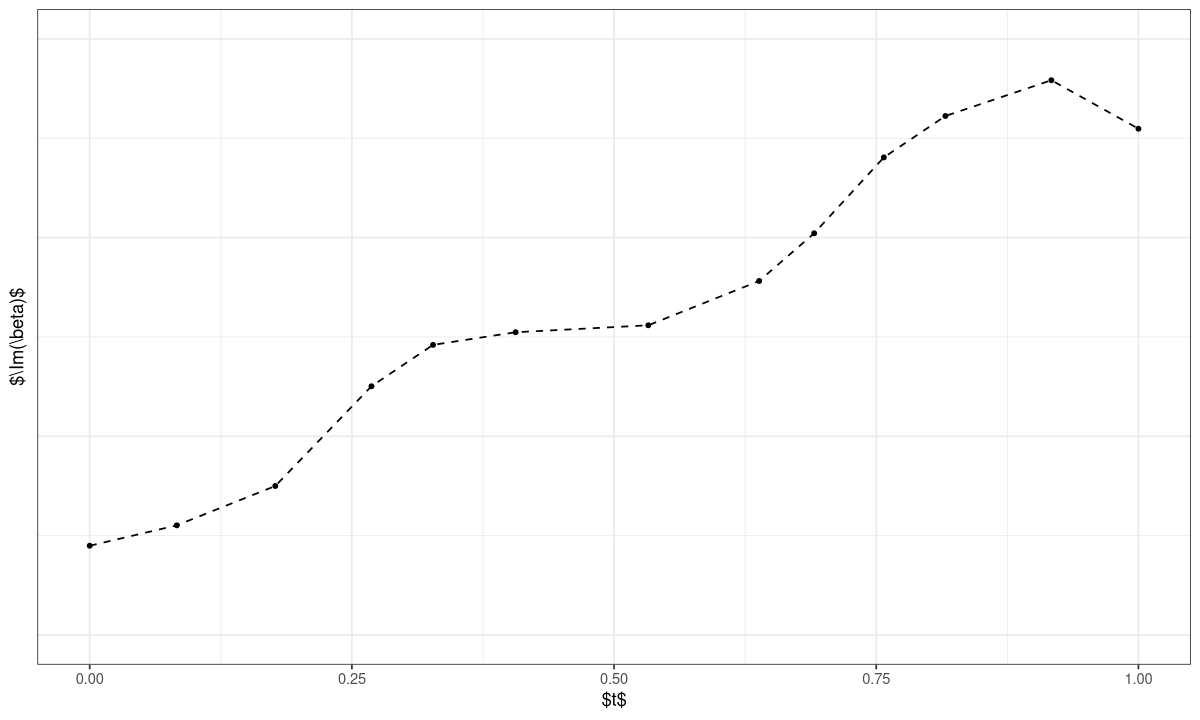

In [35]:
p.3curve <- ggplot(curve, aes(x=X1, y=X2)) + 
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size = 1, color="black") +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_fixed(xlim = c(10,40), ylim = c(-30, 0)) + 
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank())

p.3curveX <- ggplot(curve, aes(x=t, y=X1)) + 
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size=1, color="black") +
    labs(x = "$t$", y = "$\\Re(\\beta)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(10,40)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

p.3curveY <- ggplot(curve, aes(x=t, y=X2)) + 
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size=1, color="black") +    
    labs(x = "$t$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-30, 0)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

tikzDevice::tikz(file = "../tex/graphics/3-curve-discr.tex", width = 3, height = 3)
print(p.3curve)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/3-curve-discrX.tex", width = 3, height = 1.4)
print(p.3curveX)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/3-curve-discrY.tex", width = 3, height = 1.4)
print(p.3curveY)
dev.off()

plot(p.3curve)
plot(p.3curveX)
plot(p.3curveY)

#### Fig. 3.2: Discrete SRV

In [33]:
srv <- elasdics::get_srv_from_points(curve)
t_const <- c(srv$t, 1)
srv$t <- c(srv$t, 1)[-1] - 0.5*diff(c(srv$t,1))
srv_const <- bind_rows(lapply(seq(0,1,by=0.01), function(h){
    knot <- findInterval(h, t_const, rightmost.closed=T)
    entry <- srv[knot,]
    entry$t <- h
    entry
}))

png 
  2

png 
  2

png 
  2

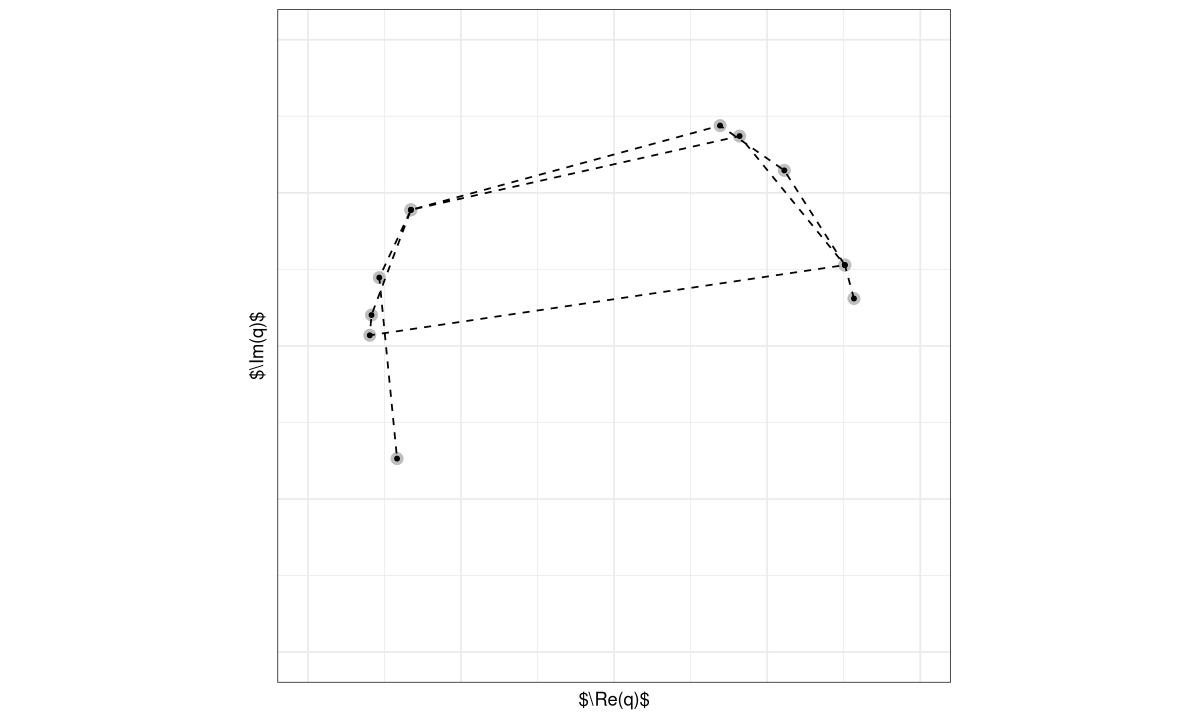

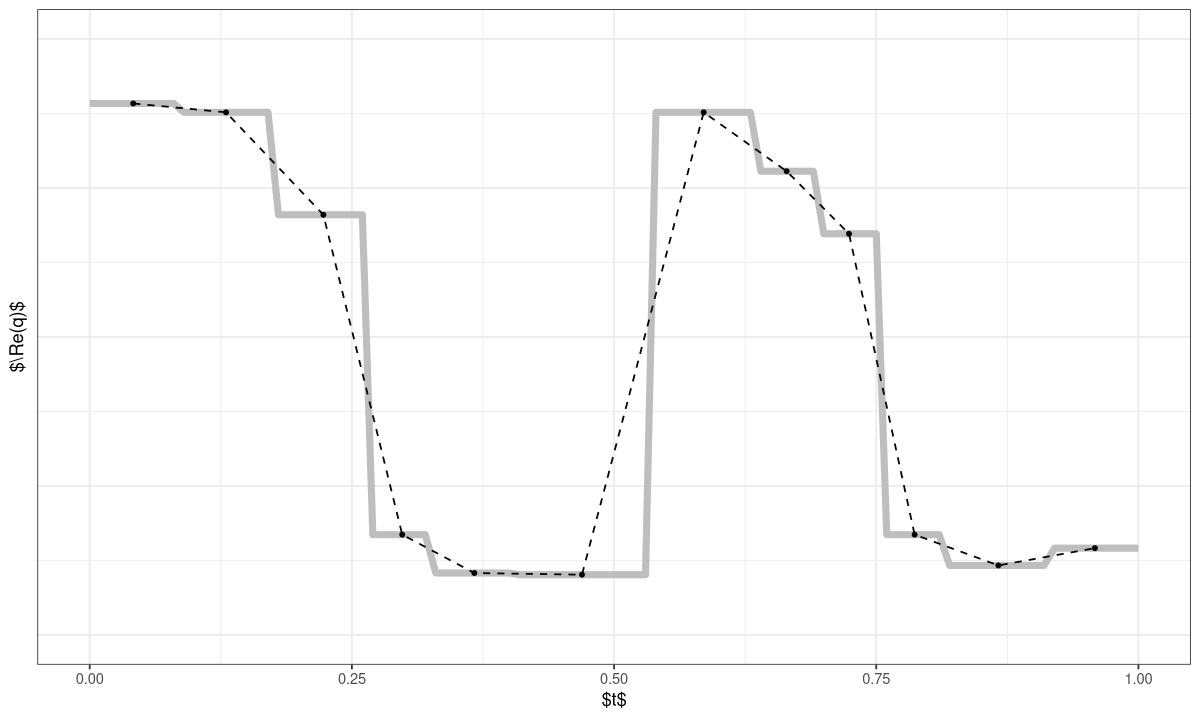

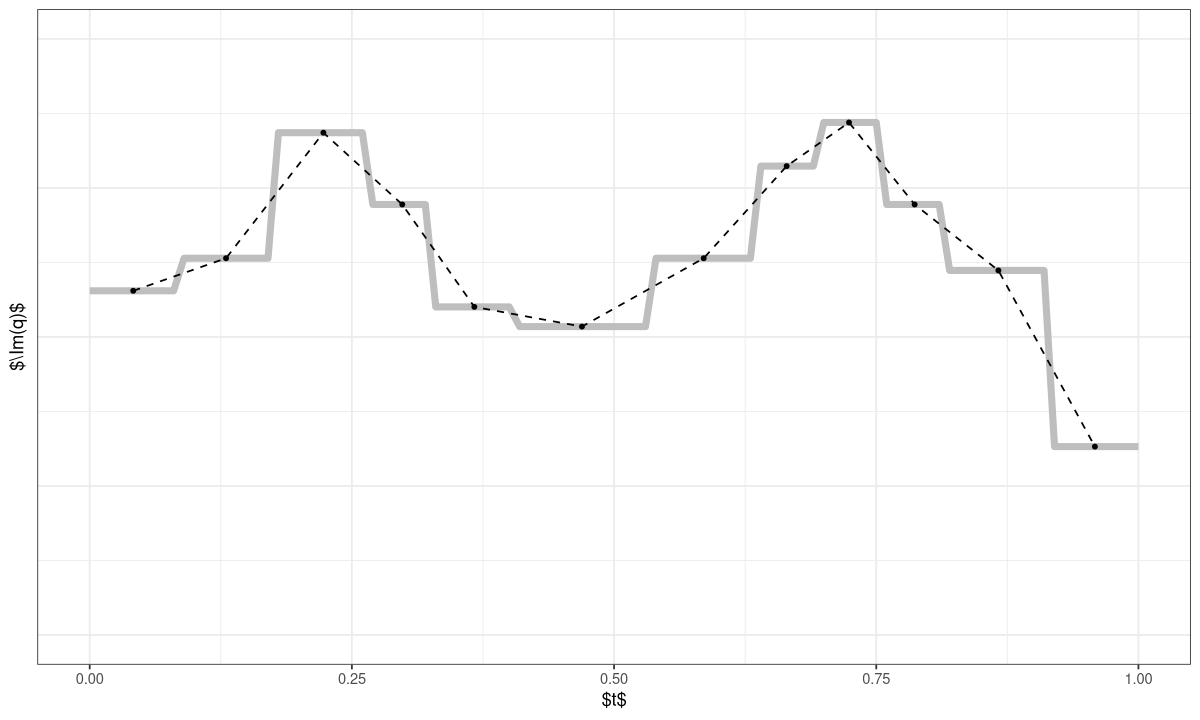

In [36]:
p.3srv <- ggplot(srv, aes(x=X1, y=X2)) + 
    geom_point(size = 3, color="grey") +
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size = 1, color="black") +
    labs(x = "$\\Re(q)$", y = "$\\Im(q)$") +
    theme_thesis() +
    coord_fixed(xlim = c(-10,10), ylim = c(-10, 10)) + 
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank())

p.3srvX <- ggplot(srv, aes(x=t, y=X1)) + 
    geom_path(data = srv_const, aes(x=t, y=X1), size= 2, color="grey") +
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size=1, color="black") +
    labs(x = "$t$", y = "$\\Re(q)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-10,10)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

p.3srvY <- ggplot(srv, aes(x=t, y=X2)) + 
    geom_path(data=srv_const,aes(x=t, y=X2), size= 2, color="grey") +
    geom_path(size = 0.5, alpha = 1, color="black", linetype="dashed") +
    geom_point(size=1, color="black") +    
    labs(x = "$t$", y = "$\\Im(q)$") +
    theme_thesis() +
    coord_cartesian(xlim = c(0,1), ylim = c(-10, 10)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

tikzDevice::tikz(file = "../tex/graphics/3-srv-discr.tex", width = 3, height = 3)
print(p.3srv)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/3-srv-discrX.tex", width = 3, height = 1.4)
print(p.3srvX)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/3-srv-discrY.tex", width = 3, height = 1.4)
print(p.3srvY)
dev.off()

plot(p.3srv)
plot(p.3srvX)
plot(p.3srvY)

#### Fig. 3.3: Covariance Surfaces

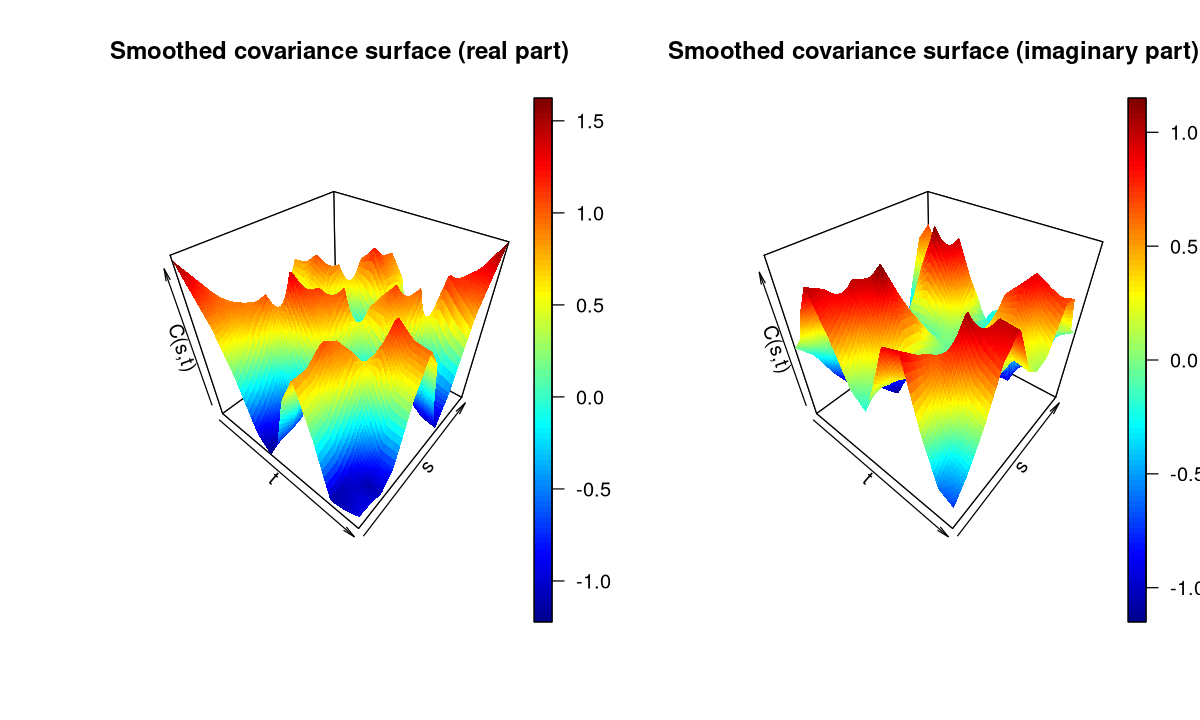

In [74]:
plot_cov_surface<- function(cov_fit, h=0.01){
  # Define covariance surface grid (s,t).
  arg.grid = seq(0, 1, by=h)
  cov.grid = expand.grid(t = arg.grid, s = arg.grid)
  # Evaluate fit on grid.
  cov.re = predict(cov_fit$re, newdata = cov.grid)
  cov.im = predict(cov_fit$im, newdata = cov.grid)

  par(mfrow=c(1,2), mar=c(4,4,4,1), oma=c(0.5,0.5,0.5,0))
  # From 'fdapace/src/R/CreateCovPlot.R'
  args1 <- list(
    xlab='t', ylab='s', zlab = 'C(s,t)',
    main = 'Smoothed covariance surface (real part)',
    col.palette = viridis(10)
  )
  args2 = list (x = arg.grid, y = arg.grid, z = matrix(cov.re, nrow=101))
  do.call(plot3D::persp3D, c(args2, args1))

  # From 'fdapace/src/R/CreateCovPlot.R'
  args1 <- list(
    xlab='t', ylab='s', zlab = 'C(s,t)',
    main = 'Smoothed covariance surface (imaginary part)'
  )
  args2 = list (x = arg.grid, y = arg.grid, z = matrix(cov.im,nrow=101))
  do.call(plot3D::persp3D, c(args2, args1))
}

plot_cov_surface(mean1$fit$cov_fit)

In [80]:
cov_fit <- mean1$fit$cov_fit
# Define covariance surface grid (s,t).
arg.grid = seq(0, 1, by=0.01)
cov.grid = expand.grid(t = arg.grid, s = arg.grid)
# Evaluate fit on grid.
cov.re = predict(cov_fit$re, newdata = cov.grid)
cov.im = predict(cov_fit$im, newdata = cov.grid)
cov <- data.frame(t=cov.grid$t,s=cov.grid$s,re=cov.re,im=cov.im)

png 
  2

png 
  2

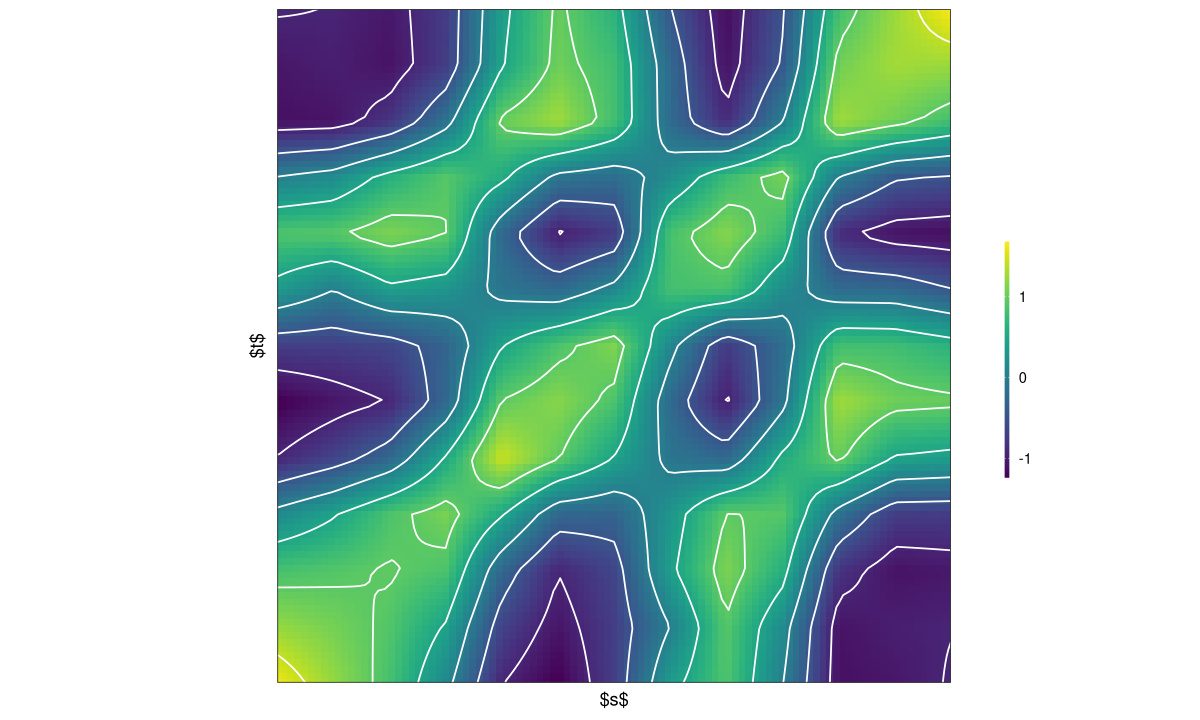

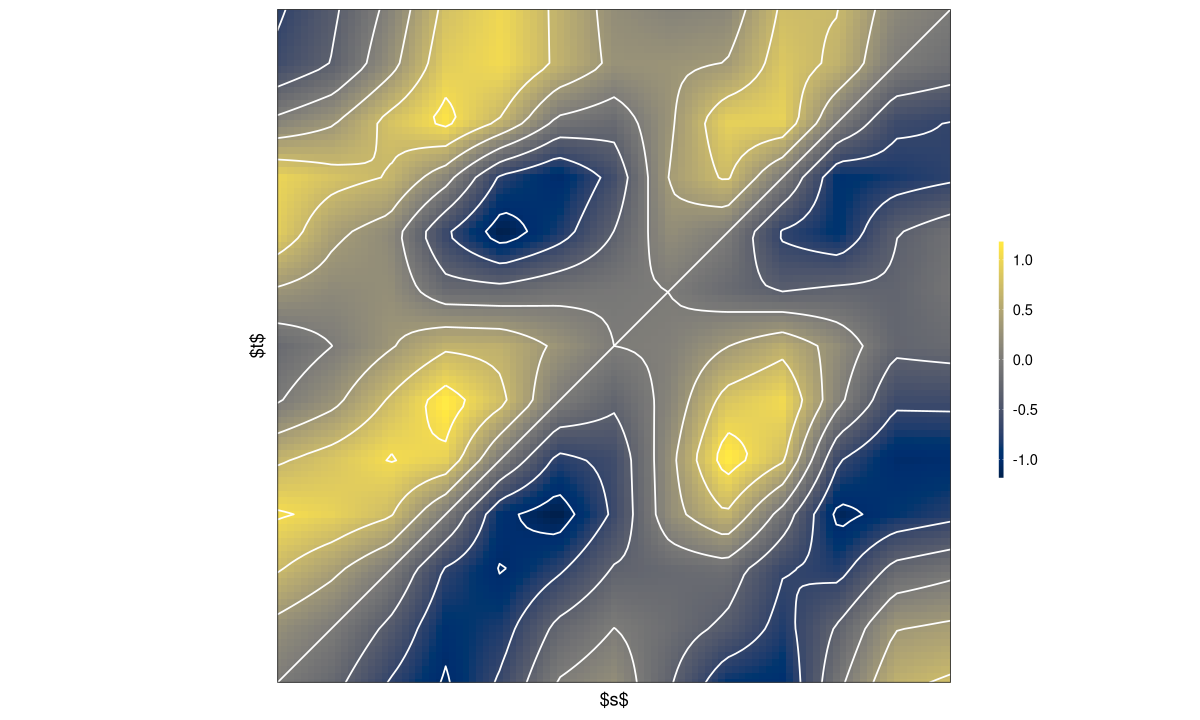

In [144]:
p.covR <- ggplot(cov, aes(s,t,z=re)) +
    geom_raster(aes(fill = re)) +
    scale_fill_viridis(option="viridis") +
    geom_contour(color="white", size=0.5, bins = 8) +
    labs(x = "$s$", y = "$t$", fill="") +
    theme_thesis() +
    theme(
        legend.key.height = unit(1, 'cm'), 
        legend.key.width = unit(0.1, 'cm'),
        legend.position = c(1.1, 0.5),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), 
        axis.text.y = element_blank()
    ) +
    coord_fixed(xlim = c(0,1), ylim = c(0, 1), expand = 0)

p.covI <- ggplot(cov, aes(s,t,z=im)) +
    geom_raster(aes(fill = im)) +
    scale_fill_viridis(option="cividis") +
    geom_contour(color="white", size=0.5, bins = 8) +
    labs(x = "$s$", y = "$t$", fill="") +
    theme_thesis() +
    theme(
        legend.key.height = unit(1, 'cm'), 
        legend.key.width = unit(0.1, 'cm'),
        legend.position = c(1.1, 0.5),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), 
        axis.text.y = element_blank()
    ) +
    coord_fixed(xlim = c(0,1), ylim = c(0, 1), expand = 0)


tikzDevice::tikz(file = "../tex/graphics/3-cov-re.tex", width = 3, height = 2.8)
print(p.covR)
dev.off()

tikzDevice::tikz(file = "../tex/graphics/3-cov-im.tex", width = 3, height = 2.8)
print(p.covI)
dev.off()

plot(p.covR)
plot(p.covI)

In [9]:
citation("orthogonalsplinebasis")


To cite package ‘orthogonalsplinebasis’ in publications use:

  Andrew Redd (2015). orthogonalsplinebasis: Orthogonal B-Spline Basis
  Functions. R package version 0.1.6.
  https://CRAN.R-project.org/package=orthogonalsplinebasis

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {orthogonalsplinebasis: Orthogonal B-Spline Basis Functions},
    author = {Andrew Redd},
    year = {2015},
    note = {R package version 0.1.6},
    url = {https://CRAN.R-project.org/package=orthogonalsplinebasis},
  }

ATTENTION: This citation information has been auto-generated from the
package DESCRIPTION file and may need manual editing, see
‘help("citation")’.
